## library & read file

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import plotly as ply
import sklearn as skl
import datetime as dt
import math

from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier

In [19]:
# load data 
df = pd.read_csv("books.csv")

In [80]:
df.shape[0], df.shape[1]

(11127, 12)

In [81]:
df['authors'].value_counts().head(10)

Stephen King        40
P.G. Wodehouse      40
Rumiko Takahashi    39
Orson Scott Card    35
Agatha Christie     33
Piers Anthony       30
Sandra Brown        29
Mercedes Lackey     29
Dick Francis        28
Terry Pratchett     23
Name: authors, dtype: int64

## data preprocessing

### delete spaces un front of one col. and change date format


In [20]:
df = df.rename(columns= {"  num_pages": "num_pages"})

In [21]:
# change from string to datetime object 
# for loop to parse date 
df["publication_Date"]= pd.Series(dtype="int")
cnt = 0
for i in range(len(df.publication_date)) :
    month,day,year = map(int,df.publication_date[i].split('/'))

    if month in [4,6,9,11] and day > 30:
        day = 30
        df["publication_Date"][i] = dt.date(year,month,day)
    elif(month==2 and day > 28 and year % 4 != 0):
        day = 28
    df["publication_Date"][i] = dt.date(year,month,day)
    cnt +=1
if (cnt == len(df.publication_date)) :
    print("no date issue" )
 

no date issue


/var/folders/dz/3jfgccdn52ggwvy9spwly7y00000gn/T/ipykernel_57430/1680810485.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["publication_Date"][i] = dt.date(year,month,day)


In [22]:
# remove publication date 
df=df.drop("publication_date",axis=1)
df.publication_Date.describe()

count          11127
unique          3678
top       2005-10-01
freq              56
Name: publication_Date, dtype: object

In [23]:
cols_adjust = df.columns.tolist()
cols_adjust

['bookID',
 'title',
 'authors',
 'average_rating',
 'isbn',
 'isbn13',
 'language_code',
 'num_pages',
 'ratings_count',
 'text_reviews_count',
 'publisher',
 'publication_Date']

In [24]:
cols_adjust

['bookID',
 'title',
 'authors',
 'average_rating',
 'isbn',
 'isbn13',
 'language_code',
 'num_pages',
 'ratings_count',
 'text_reviews_count',
 'publisher',
 'publication_Date']

In [25]:
df = df[cols_adjust]
df

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publisher,publication_Date
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,Scholastic Inc.,2006-09-16
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,Scholastic Inc.,2004-09-01
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,Scholastic,2003-11-01
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,Scholastic Inc.,2004-05-01
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,Scholastic,2004-09-13
...,...,...,...,...,...,...,...,...,...,...,...,...
11122,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,Da Capo Press,2004-12-21
11123,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,Penguin Books,1988-12-01
11124,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,Penguin Books,1993-08-01
11125,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,Ecco,2007-02-27


<AxesSubplot: >

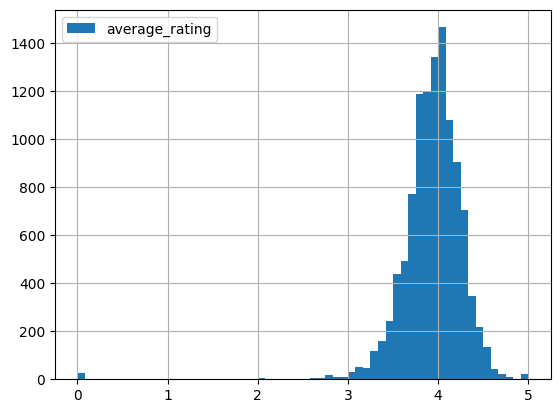

In [26]:
df.average_rating.hist(bins=60, legend={""})

In [27]:
df.average_rating.describe()

count    11127.000000
mean         3.933631
std          0.352445
min          0.000000
25%          3.770000
50%          3.960000
75%          4.135000
max          5.000000
Name: average_rating, dtype: float64

# dataframe processing

#### index of data frames
df1: numerical data: <br>
`['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count']` <br>
<br>
df2: numerical data + categorical data <br>
`['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count']` <br>
- df_l_a_p.columns[2] # target
- df_l_a_p.columns[5:8] # numerical features
- df_l_a_p.columns[9:36] # [languages]
- df_l_a_p.columns[36:6679] # [authors]
- df_l_a_p.columns[6679:8971] # [publishers]


In [28]:
df_l = pd.concat([df, pd.get_dummies(df.language_code)], axis=1).drop(columns="language_code")
df_l_a = pd.concat([df_l, pd.get_dummies(df_l.authors)], axis=1).drop(columns="authors")
df_l_a_p = pd.concat([df_l_a, pd.get_dummies(df_l_a.publisher)], axis=1).drop(columns="publisher")

In [29]:
# df1 process
df1 = df[['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count']]

In [30]:
# df2 process
col_list_2 = df_l_a_p.columns.tolist()

In [31]:
# df2 process
col_temp_2 = col_list_2[2:3] + col_list_2[5:8] + col_list_2[9:36] + col_list_2[36:6679] + col_list_2[6679:8971]
df2 = df_l_a_p[col_temp_2]

In [32]:
# df3 process
col_temp_3 = col_list_2[2:3] + col_list_2[5:8] + col_list_2[36:6679]
df3 = df_l_a_p[col_temp_3]

In [98]:
# df4 process
col_temp_4 = col_list_2[2:3] + col_list_2[5:8] + col_list_2[36:6679] + col_list_2[6679:8971]
df4 = df_l_a_p[col_temp_4]

# spliting data and data modeling - df1

In [33]:
from sklearn.model_selection import train_test_split
train0,test = train_test_split(df1, test_size= 20,random_state=42)

In [34]:
# split train0 in train and valid 
train,valid = train_test_split(train0,test_size=40,random_state=42)

In [35]:
# subsetting 
# train0
X_train0 = train0.drop("average_rating",axis = 1)
y_train0 = train0.average_rating

# train
X_train = train.drop("average_rating",axis = 1)
y_train = train.average_rating

# valid 
X_valid = valid.drop("average_rating",axis=1)
y_valid = valid.average_rating

# test 
X_test = test.drop("average_rating",axis = 1)
y_test = test.average_rating

In [36]:
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [37]:
reg.coef_

array([ 2.19042388e-04,  1.07767098e-07, -2.07788059e-07])

In [38]:
reg_ridge = linear_model.Ridge(alpha=0.01)
reg_ridge.fit(X_train,y_train)

Ridge(alpha=0.01)

In [39]:
reg_ridge_CV = linear_model.RidgeCV(alphas=[0.001,0.01,0.1,1,10],cv=5)
reg_ridge_CV.fit(X_train0,y_train0)

RidgeCV(alphas=[0.001, 0.01, 0.1, 1, 10], cv=5)

In [40]:
#from sklearn import linear_model, alpha = 0.5
reg_lasso = linear_model.Lasso(alpha=0.5)
reg_lasso.fit(X_train,y_train)

Lasso(alpha=0.5)

In [41]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [94]:
y_train_int = np.asarray(y_train, dtype="|S6")
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,2), random_state=1)
clf.fit(X_train, y_train_int)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [95]:
y_train_int

array([b'4.05', b'3.0', b'4.24', ..., b'3.99', b'4.02', b'3.43'],
      dtype='|S6')

### setting up R-squared and RMSE indices

In [42]:
def model_cross_val(models={}, X_test=None, y_test=None, cv=None, scoring=()):
    scoring_method = ("r2", "neg_root_mean_squared_error")
    table = {"r2": [], "neg_root_mean_squared_error": []}
    #table_r2 = []
    #table_rmse = []

    for mod in models:
        for sco in scoring_method:
            score = cross_val_score(models[mod], X_test, y_test, cv=cv, scoring=sco).mean()
            if sco == "r2":
                table[sco].append(score)
            else:
                table[sco].append(abs(score))
    
    print(
        pd.DataFrame(data = table, index = models, columns=table.keys())
        .sort_values(by=list(table.keys())[0], ascending=False)
    )


In [43]:
models = {"linear reg": reg, "random forest": rf}

In [100]:
models = {"linear reg": reg,"ridge model":reg_ridge,"lasso model ": reg_lasso,
"ridge CV":reg_ridge_CV,"random forest":rf}

In [101]:
model_cross_val(models, X_test, y_test, cv=10)

                     r2  neg_root_mean_squared_error
lasso model   -1.370582                     0.169660
ridge CV      -2.063746                     0.181474
ridge model   -2.066523                     0.181517
linear reg    -2.066526                     0.181517
random forest -4.719662                     0.183738


# spliting data and data modeling - df2 (numerical + categorical data)

`['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count', 'languages', 'authors', 'publishers']`

In [46]:
# df2 split: train0, test
train_2_0,test_2 = train_test_split(df2, test_size= 20,random_state=42)

In [47]:
# split train0 in train and valid 
train_2,valid_2 = train_test_split(train_2_0,test_size=40,random_state=42)

In [59]:
# subsetting df2
# train0
X_train_2_0 = train_2_0.drop("average_rating",axis = 1)
y_train_2_0 = train_2_0.average_rating

# train
X_train_2 = train_2.drop("average_rating",axis = 1)
y_train_2 = train_2.average_rating

# valid 
X_valid_2 = valid_2.drop("average_rating",axis=1)
y_valid_2 = valid_2.average_rating

# test 
X_test_2 = test_2.drop("average_rating",axis = 1)
y_test_2 = test_2.average_rating

In [60]:
reg_2 = linear_model.LinearRegression()
reg_2.fit(X_train_2,y_train_2)

LinearRegression()

In [61]:
reg_ridge_2 = linear_model.Ridge(alpha=0.01)
reg_ridge_2.fit(X_train_2,y_train_2)

/Users/m22/conda/envs/env_pylab/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.06613e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge(alpha=0.01)

In [62]:
# A SERIOUS PROBLEM RUNNING REG RIDGE
reg_ridge_CV_2 = linear_model.RidgeCV(alphas=[0.001,0.01,0.1,1,10],cv=5)
reg_ridge_CV_2.fit(X_train_2_0,y_train_2_0)

/Users/m22/conda/envs/env_pylab/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Users/m22/conda/envs/env_pylab/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Users/m22/conda/envs/env_pylab/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Users/m22/conda/envs/env_pylab/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Users/m22/conda/envs/env_pylab/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution i

KeyboardInterrupt: 

In [63]:
reg_lasso_2 = linear_model.Lasso(alpha=0.5)
reg_lasso_2.fit(X_train_2,y_train_2)

Lasso(alpha=0.5)

In [65]:
rf_2 = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf_2.fit(X_train_2, y_train_2)

RandomForestRegressor(random_state=42)

In [102]:
models_2 = {"linear reg": reg_2,"ridge model":reg_ridge_2,"lasso model ": reg_lasso_2,
"ridge CV":reg_ridge_CV_2,"random forest":rf_2}

# RIDGE MODEL MIGHT NOT BE VALID
model_cross_val(models_2, X_test_2, y_test_2, cv=10)

                     r2  neg_root_mean_squared_error
lasso model   -1.370582                     0.169660
ridge model   -1.794781                     0.196864
linear reg    -1.795861                     0.196901
ridge CV      -2.241187                     0.198287
random forest -3.729992                     0.175169


# spliting data and data modeling - df3 (numerical + categorical data)

`['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count', 'authors']`

In [50]:
# df3 split: train0, test
train_3_0,test_3 = train_test_split(df3, test_size= 20,random_state=42)

In [51]:
# split train0 in train and valid 
train_3,valid_3 = train_test_split(train_3_0,test_size=40,random_state=42)

In [52]:
# subsetting df2
# train0
X_train_3_0 = train_3_0.drop("average_rating",axis = 1)
y_train_3_0 = train_3_0.average_rating

# train
X_train_3 = train_3.drop("average_rating",axis = 1)
y_train_3 = train_3.average_rating

# valid 
X_valid_3 = valid_3.drop("average_rating",axis=1)
y_valid_3 = valid_3.average_rating

# test 
X_test_3 = test_3.drop("average_rating",axis = 1)
y_test_3 = test_3.average_rating

In [53]:
reg_3 = linear_model.LinearRegression()
reg_3.fit(X_train_3,y_train_3)

LinearRegression()

In [54]:
reg_ridge_3 = linear_model.Ridge(alpha=0.01)
reg_ridge_3.fit(X_train_3,y_train_3)

/Users/m22/conda/envs/env_pylab/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.96457e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge(alpha=0.01)

In [55]:
# A SERIOUS PROBLEM RUNNING REG RIDGE
reg_ridge_CV_3 = linear_model.RidgeCV(alphas=[0.001,0.01,0.1,1,10],cv=5)
reg_ridge_CV_3.fit(X_train_3_0,y_train_3_0)

/Users/m22/conda/envs/env_pylab/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.23235e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/m22/conda/envs/env_pylab/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.10789e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/m22/conda/envs/env_pylab/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.94625e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/m22/conda/envs/env_pylab/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.04209e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/m

RidgeCV(alphas=[0.001, 0.01, 0.1, 1, 10], cv=5)

In [56]:
reg_lasso_3 = linear_model.Lasso(alpha=0.5)
reg_lasso_3.fit(X_train_3,y_train_3)

Lasso(alpha=0.5)

In [57]:
rf_3 = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf_3.fit(X_train_3, y_train_3)

RandomForestRegressor(random_state=42)

In [58]:
models_3 = {"linear reg": reg_3,"ridge model":reg_ridge_3,"lasso model ": reg_lasso_3,
"ridge CV":reg_ridge_CV_3,"random forest":rf_3}

# RIDGE MODEL MIGHT NOT BE VALID
model_cross_val(models_3, X_test_3, y_test_3, cv=10)

                     r2  neg_root_mean_squared_error
lasso model   -1.370582                     0.169660
ridge CV      -2.063469                     0.181470
ridge model   -2.066245                     0.181513
linear reg    -2.066247                     0.181513
random forest -3.794531                     0.179746


# spliting data and data modeling - df4 (numerical + categorical data)

`['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count', 'authors', 'publishers']`

In [71]:
# df4 split: train0, test
train_4_0,test_4 = train_test_split(df4, test_size= 20,random_state=42)

In [72]:
# split train0 in train and valid 
train_4,valid_4 = train_test_split(train_4_0,test_size=40,random_state=42)

In [73]:
# subsetting df4
# train0
X_train_4_0 = train_4_0.drop("average_rating",axis = 1)
y_train_4_0 = train_4_0.average_rating

# train
X_train_4 = train_4.drop("average_rating",axis = 1)
y_train_4 = train_4.average_rating

# valid 
X_valid_4 = valid_4.drop("average_rating",axis=1)
y_valid_4 = valid_4.average_rating

# test 
X_test_4 = test_4.drop("average_rating",axis = 1)
y_test_4 = test_4.average_rating

In [74]:
reg_4 = linear_model.LinearRegression()
reg_4.fit(X_train_4,y_train_4)

LinearRegression()

In [75]:
reg_ridge_4 = linear_model.Ridge(alpha=0.01)
reg_ridge_4.fit(X_train_4,y_train_4)

/Users/m22/conda/envs/env_pylab/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.07053e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge(alpha=0.01)

In [76]:
# A SERIOUS PROBLEM RUNNING REG RIDGE
reg_ridge_CV_4 = linear_model.RidgeCV(alphas=[0.001,0.01,0.1,1,10],cv=5)
reg_ridge_CV_4.fit(X_train_4_0,y_train_4_0)

/Users/m22/conda/envs/env_pylab/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Users/m22/conda/envs/env_pylab/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Users/m22/conda/envs/env_pylab/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Users/m22/conda/envs/env_pylab/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Users/m22/conda/envs/env_pylab/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution i

KeyboardInterrupt: 

In [77]:
reg_lasso_4 = linear_model.Lasso(alpha=0.5)
reg_lasso_4.fit(X_train_4,y_train_4)

Lasso(alpha=0.5)

In [78]:
rf_4 = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf_4.fit(X_train_4, y_train_4)

RandomForestRegressor(random_state=42)

In [79]:
models_4 = {"linear reg": reg_4,"ridge model":reg_ridge_4,"lasso model ": reg_lasso_4,
"ridge CV":reg_ridge_CV_4,"random forest":rf_4}

# RIDGE MODEL MIGHT NOT BE VALID
model_cross_val(models_4, X_test_4, y_test_4, cv=10)

                     r2  neg_root_mean_squared_error
lasso model   -1.370582                     0.169660
ridge CV      -2.063191                     0.181465
ridge model   -2.065966                     0.181509
linear reg    -2.065969                     0.181509
random forest -4.252993                     0.178676
